In [71]:
# importing necessary libraries and pakages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import  SVC
from sklearn.linear_model import LogisticRegression
import category_encoders as ce
from imblearn.over_sampling import SMOTE
import xgboost
from sklearn.feature_selection import SelectKBest,mutual_info_classif,f_classif
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble.gradient_boosting import  GradientBoostingClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold,StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
sb.set()

In [11]:
ds = pd.read_csv('Absenteeism_at_work.csv',sep = ';')
ds

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


###  EDA and Data-preprocessing

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

From above info table, we have got no missing values to impute.

In [13]:
for col in ds.columns:
    print('unique value of ' +col+ ' : ', ds[col].value_counts().count())

unique value of ID :  36
unique value of Reason for absence :  28
unique value of Month of absence :  13
unique value of Day of the week :  5
unique value of Seasons :  4
unique value of Transportation expense :  24
unique value of Distance from Residence to Work :  25
unique value of Service time :  18
unique value of Age :  22
unique value of Work load Average/day  :  38
unique value of Hit target :  13
unique value of Disciplinary failure :  2
unique value of Education :  4
unique value of Son :  5
unique value of Social drinker :  2
unique value of Social smoker :  2
unique value of Pet :  6
unique value of Weight :  26
unique value of Height :  14
unique value of Body mass index :  17
unique value of Absenteeism time in hours :  19


From above data, we see most columns are somewhat categorical in nature, particularly those values having less unique values.

In [14]:
numeric = []
cat = []

for col in ds.columns:
    if len(ds[col].unique()) > 13:
        numeric.append(col)
    
    else:
        cat.append(col)
print('numeric :', numeric,'\n')
print('cat :',cat)

numeric : ['ID', 'Reason for absence', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours'] 

cat : ['Month of absence', 'Day of the week', 'Seasons', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']


In [15]:
for col in cat:
    print('unique value of ' +col+ ' : ','\n', ds[col].value_counts())
    print('------------------------------------------------------')

unique value of Month of absence :  
 3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64
------------------------------------------------------
unique value of Day of the week :  
 2    161
4    156
3    154
6    144
5    125
Name: Day of the week, dtype: int64
------------------------------------------------------
unique value of Seasons :  
 4    195
2    192
3    183
1    170
Name: Seasons, dtype: int64
------------------------------------------------------
unique value of Hit target :  
 93     105
99     102
97      89
92      79
96      75
95      75
98      66
91      45
94      34
88      28
81      19
87      12
100     11
Name: Hit target, dtype: int64
------------------------------------------------------
unique value of Disciplinary failure :  
 0    700
1     40
Name: Disciplinary failure, dtype: int64
------------------------------------------------------
unique value of

From above data, we see that month has 13 unique values, which is not correct, therefore, we shall group month 0 in month 12.

Also from other columns, we see that some are nominal nature like- Disciplinary failure, Social drinker, Social smoker, whereas others may be ordinal, so we shall group them accordingly.

In [16]:
# grouping month 0 with 12
ds['Month of absence'].replace(0,12,inplace = True)

In [17]:
nominal = []
ordinal = []

for col in cat:
    if len(ds[col].unique()) > 5: # here we shall treat categorical variables having unique value greater then 5 as ordinal.
        ordinal.append(col)
    else:
        nominal.append(col)
print('nominal variables: ', nominal,'\n')
print('ordinal variable :', ordinal)

nominal variables:  ['Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker'] 

ordinal variable : ['Month of absence', 'Hit target', 'Pet']


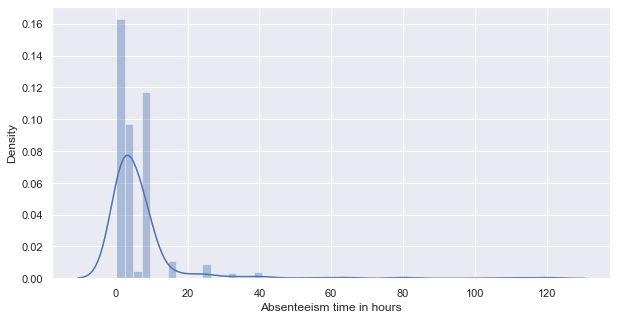

In [18]:
plt.figure(figsize  = (10,5))
sb.distplot(ds['Absenteeism time in hours'])
plt.show()

From above distplot, we see that most of the hours of Absenteeism in workers occurs between 0-20 hours.

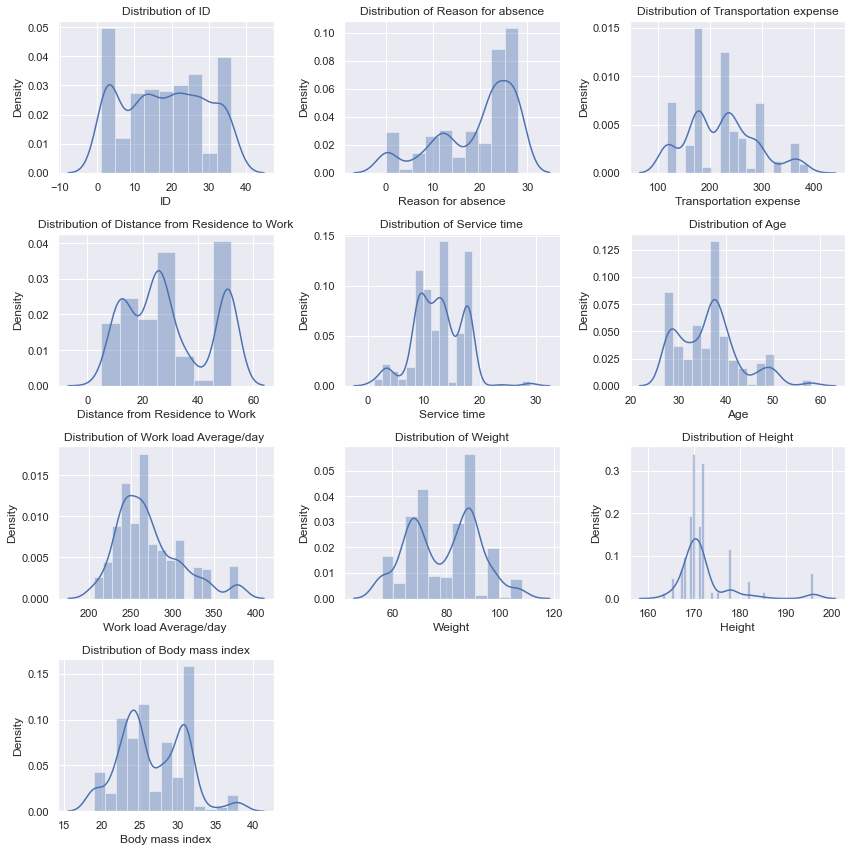

In [19]:
for i,col in enumerate(numeric[:-1]):
    plt.subplot(4,3 ,i+1)
    sb.distplot(ds[col])
    plt.title('Distribution of '+col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12, 12)
    plt.tight_layout()
plt.show()

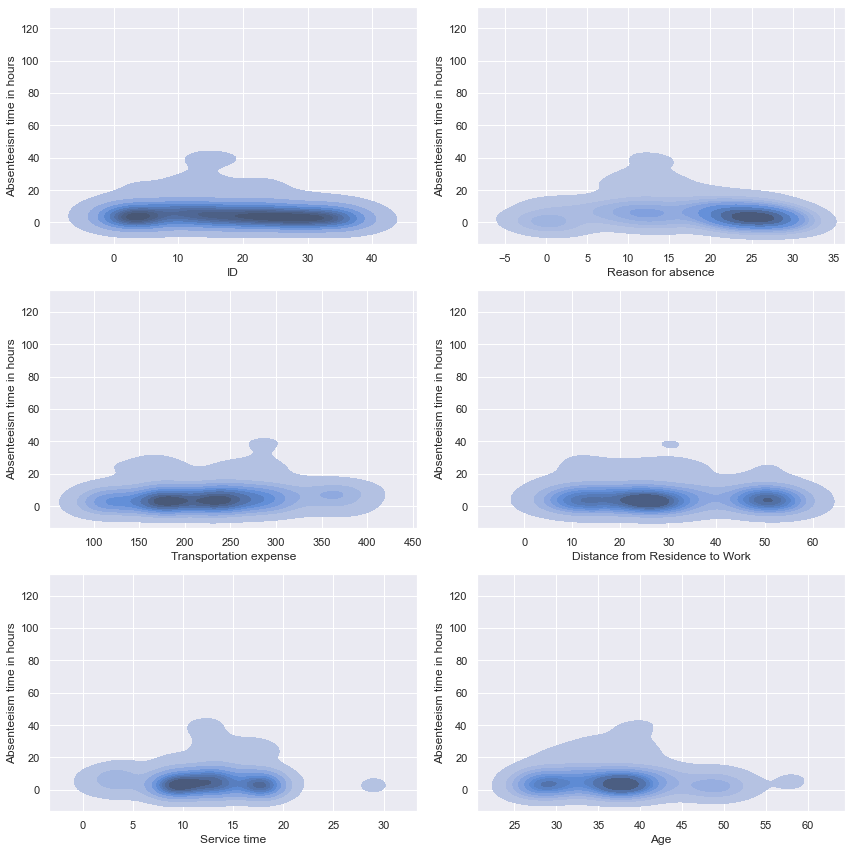

In [20]:
for i, col in enumerate(numeric[0:6]):
    
    plt.subplot(3,2, i+1)
    sb.kdeplot(x =  col , y = 'Absenteeism time in hours', data =  ds ,fill = True, color = 'b'
              )
    
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12,12)
    plt.tight_layout()
plt.show()

From above bivariate kde plots, we observe that: 

Different categories of reasons, having range between 20-30, have higher changes of  absenteeism. Aslo, this column can be treated as categorical column for modelling.

Age groups having range btween 35 to 40 have higher chances of absenteeism.

Service time of around 10 have higher chances of absenteeism.

We see that moderate transportation expenses shows higer cahnces of absenteeism.

We see distance from residence having values between 20-30 and close to 50 have higher chances of absentism.

Also, earlier we saw that column ID had 36 unique values, to which we shall treat as categorical variable.

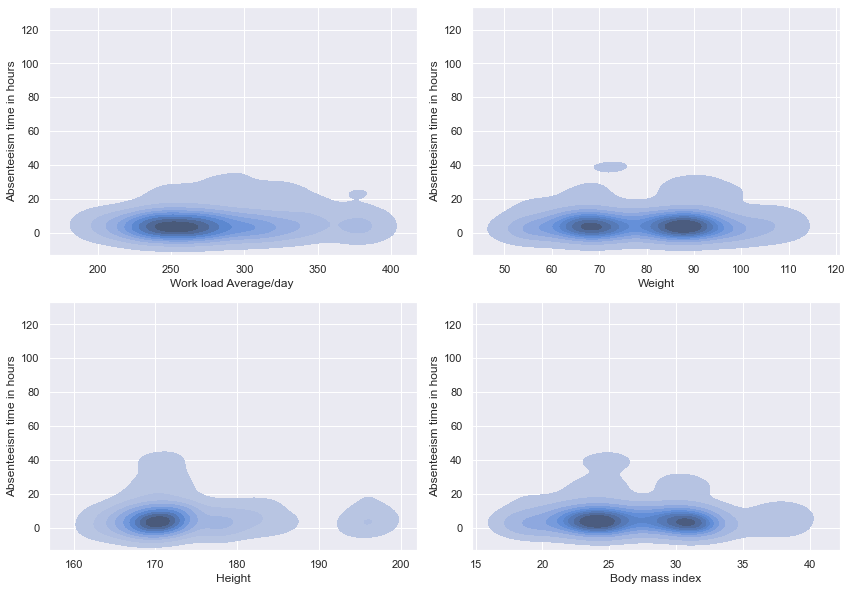

In [21]:
for i, col in enumerate(numeric[6:10]):
    
    plt.subplot(3,2, i+1)
    sb.kdeplot(x =  col , y = 'Absenteeism time in hours', data =  ds ,fill = True, color = 'b'
              )
    
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12,12) 
    plt.tight_layout()
plt.show()

From above bivariate kde plots, we observe that: 
    
We see that work load average around 250 has higher chances of absenteeism.

Weight of workers having close to 70 and 90 has higher chances of absenteeism.

Height of workers having close to 170 has higher chances of absenteeism.

Body bass index close to 25 and 30 has higher chances of absenteeism.

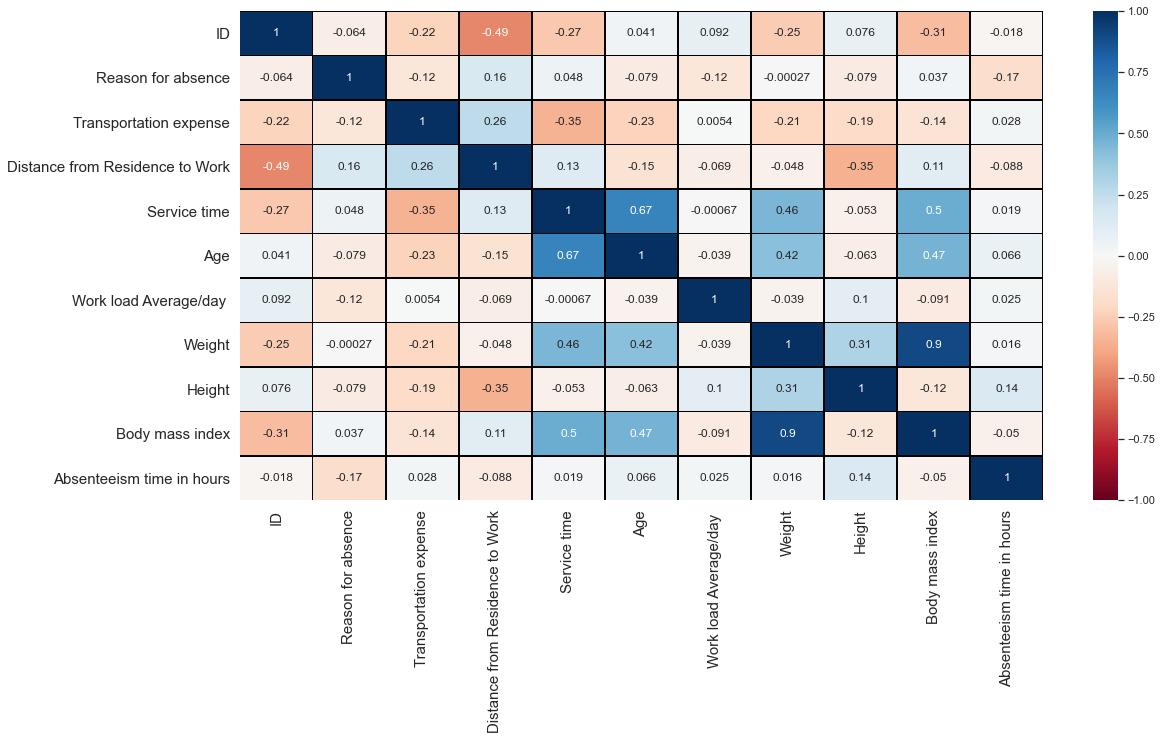

In [22]:
plt.figure(figsize = (18,9))
sb.heatmap(ds[numeric].corr(), cmap = 'RdBu', vmin = -1, vmax = 1, center = 0, 
           linewidth = .5, linecolor = 'black', annot = True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

From the above heatmap, we see that our target variable (i.e. absenteeism as work) is not directly correlated with other variables.

Body mass index is highly dependant on weigth rather then height.

Service time of the workers are fairly correlated with their age and weight.

<AxesSubplot:xlabel='Absenteeism time in hours'>

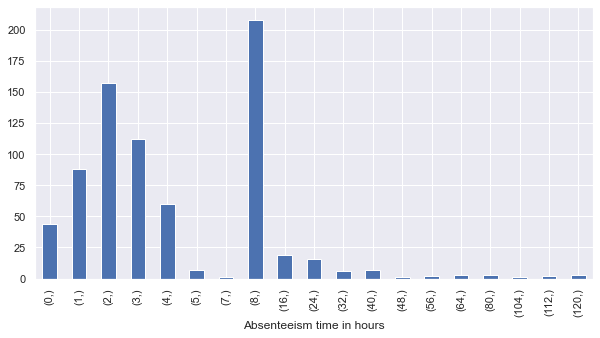

In [23]:
plt.figure(figsize = (10,5))
ds[['Absenteeism time in hours']].value_counts().sort_index().plot.bar()

From above Bar chart, we see that most of the workers are absent for 8 hours, and we also  see workers that are probably on time (indicated by 0 hours).

Also after 8 hours mark, we don't see many workers that are absent.

So based on above distribution of workers with respect to their absent time, we shall group workers who are almost on time (marked by 0 hour), and from 1 hour onwards till 7 hours, we shall group the workers together, also, to properly capture the 8 hour group and beyond, we shall group them separately.

In [24]:
# binning target column ('Absenteeism time in hours') based on above plot for  analysis and modelling.
ds['Absenteeism degree'] = ds['Absenteeism time in hours'].transform(lambda x: 'Low' if x == 0
                                          else ('Medium' if 0 < x < 8 
                                          else 'High'
                                           ))

In [25]:
ds['Absenteeism degree'].value_counts()

Medium    425
High      271
Low        44
Name: Absenteeism degree, dtype: int64

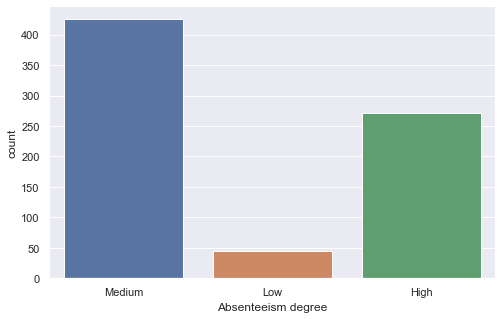

In [26]:
plt.figure(figsize = (8,5))
sb.countplot(x = 'Absenteeism degree', data = ds)
plt.show()

From above plot, the workers who probably are less absent (i.e. Absenteeism degree 'Low') are significantly less then that of degree Medium or High, in other words, there is class imbalance in our target variable. Therefore, we shall use synthetic sampling technique like SMOTE( Synthetic Minority Over-sampling Technique). 

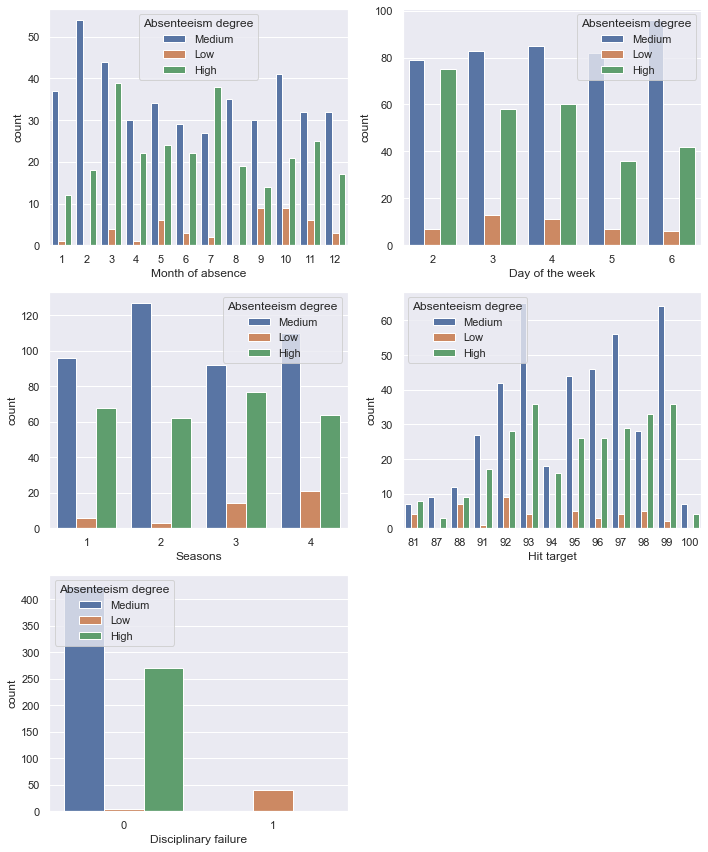

In [27]:
for i,col in enumerate(cat[0:5]):
    plt.subplot(3,2 ,i+1)
    sb.countplot(x = col, hue = 'Absenteeism degree', data = ds)
    fig, ax = plt.gcf(), plt.gca()
    
    fig.set_size_inches(10, 12)
    plt.tight_layout()
plt.show()

From above boxplots, we see that during month 2 and 3, we see relatively high absent workers, particulary on month 3 where the number of workers that are absent for  8 hours and more are relatively high.

It is interesting to see that, for disciplinary failure category 1 (i.e. 1 = yes), we see drastic reduction of absent workers,i.e. most workers worked on time. 

Hit target 99 has relatively high absent workers.

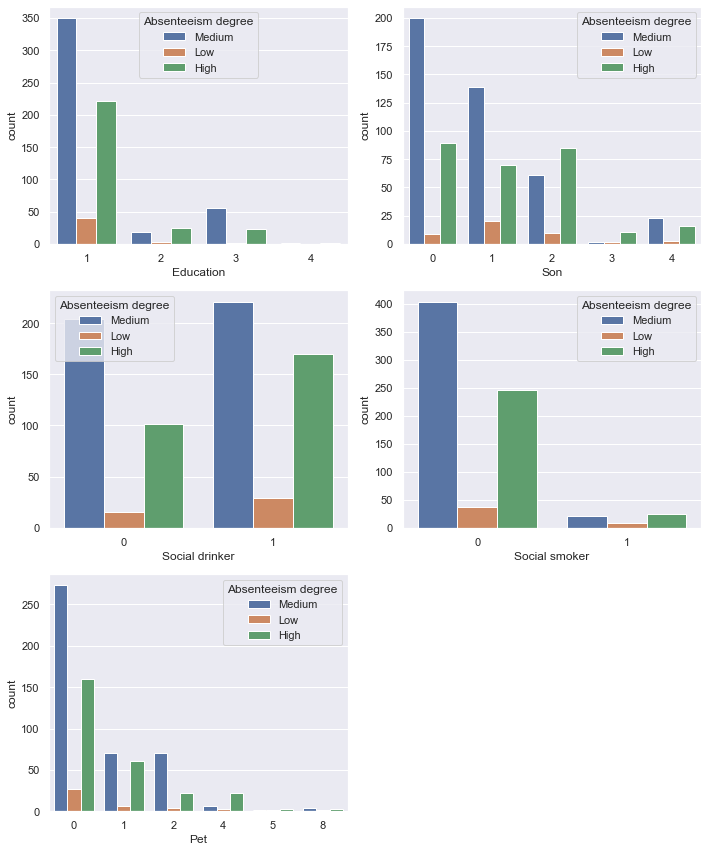

In [28]:
for i,col in enumerate(cat[5:]):
    plt.subplot(3,2 ,i+1)
    sb.countplot(x = col, hue = 'Absenteeism degree', data = ds)
    fig, ax = plt.gcf(), plt.gca()
    
    fig.set_size_inches(10, 12)
    plt.tight_layout()
plt.show()

From  above plots, we see that: 

Workers that don't own any pet, tend to go to work late and hence, leading to absenteeism. Also, number of absent workers decreases as the number of pet owned increases.

People how are social drinkers  tend to be late and absent during work more often then the social smoker.

Workers how has 3 or 4 sons tend to be less absent during work.

Workers having educational qualification level 1, significantly tend to go to work late, leading to absenteeism .

In [29]:
# removing column 'ID' from  numeric list and appending it to ordinal list
ordinal.append('ID')
numeric.remove('ID')
# removing column ''Reason for absence'' from  numeric list and appending it to ordinal list
ordinal.append('Reason for absence')
numeric.remove('Reason for absence')

In [30]:
# removing 'Absenteeism time in hours', as it has been accounted by binned variables.
numeric.remove('Absenteeism time in hours')

In [31]:
# appending 'Reason for absence' and 'ID' in cat list
cat.append('Reason for absence')
cat.append('ID')

In [32]:
# removing columns 'Son','Day of the week' and 'Education' from  nominal list and appending it to ordinal list
nominal.remove('Son')
nominal.remove('Day of the week')
nominal.remove('Education')
ordinal.append('Son')
ordinal.append('Day of the week')
ordinal.append('Education')

In [33]:
# removing column 'Seasons' from  nonimal list and appending it to ordinal list
ordinal.append('Seasons')
nominal.remove('Seasons')

In [34]:
nominal

['Disciplinary failure', 'Social drinker', 'Social smoker']

In [35]:
ordinal

['Month of absence',
 'Hit target',
 'Pet',
 'ID',
 'Reason for absence',
 'Son',
 'Day of the week',
 'Education',
 'Seasons']

In [36]:
# mapping string data to numeric for modelling.
ds['Absenteeism degree'] = ds['Absenteeism degree'].map({'Low': 0,
                                                         'Medium':1,
                                                         'High':2})

In [37]:
s =  StratifiedKFold(n_splits = 10)

In [38]:
score_list = [] 
model  = RandomForestClassifier(random_state = 42)
for r_state in np.arange(1,101,1):
        
        
        x_train, x_test, y_train, y_test = train_test_split(ds.drop(['Absenteeism degree','Absenteeism time in hours'], 1), 
                                                    ds['Absenteeism degree'],
                                                    stratify = ds['Absenteeism degree'],
                                                test_size = 0.30, random_state = 42)
        
         
        for col in ordinal:
        

            encoder =  ce.TargetEncoder(cols = col)
            x_train[col] = encoder.fit_transform(x_train[col], y_train)
        

        x_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = r_state).fit_sample(x_train,y_train)
        score = cross_val_score(model, x_train, y_train, cv = s, scoring = 'f1_weighted', n_jobs = -1 ).mean()
        score_list.append(score)

print('optimum score of :',max(score_list), ' correspounds to random state :', score_list.index(max(score_list))+1)

optimum score of : 0.9187709354140996  correspounds to random state : 14


In [39]:
# Here again, we are trying to tune the smoothing parameter using cross validation on training-set.
# for classification task.
x_train, x_test, y_train, y_test = train_test_split(ds.drop(['Absenteeism degree','Absenteeism time in hours'], 1), 
                                                    ds['Absenteeism degree'],
                                                    stratify = ds['Absenteeism degree'],
                                                test_size = 0.30, random_state = 42) 
    
smote = SMOTE(sampling_strategy = 'auto',random_state= 14)
x_train, y_train = smote.fit_sample(x_train,y_train)


score_list = []
smoothing_list = np.arange(0,5,.125)
model  =  RandomForestClassifier(random_state = 42) # using RandomForestClassifier model for tuning smoothing parameter.
for num in smoothing_list:
    x_train_en = x_train.copy()
    
    for col in ordinal:
        

        encoder =  ce.TargetEncoder(cols = col, smoothing = num)
        x_train_en[col] = encoder.fit_transform(x_train_en[col], y_train)
        
       
        
        
    score = cross_val_score(model, x_train_en, y_train, cv = s, scoring = 'f1_weighted', n_jobs = -1 ).mean()
    score_list.append(score)
        
print('Optimum cross-val-score:',max(score_list),
      'corresponds to smoothing value of:',smoothing_list[score_list.index(max(score_list))])    

Optimum cross-val-score: 0.9122492057428289 corresponds to smoothing value of: 1.125


In [72]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(ds.drop(['Absenteeism degree','Absenteeism time in hours'], 1), 
                                                    ds['Absenteeism degree'],
                                                    stratify = ds['Absenteeism degree'],
                                                test_size = 0.30, random_state = 42) 

In [73]:
x_train

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
560,28,23,12,4,4,225,26,9,28,280.549,98,0,1,1,0,0,2,69,169,24
695,17,10,5,4,3,179,22,17,40,237.656,99,0,2,2,0,1,0,63,170,22
507,32,4,10,5,4,289,48,29,49,284.853,91,0,1,0,0,0,2,108,172,36
595,3,27,2,2,2,179,51,18,38,264.249,97,0,1,0,1,0,0,89,170,31
253,30,19,8,6,1,157,27,6,29,265.615,94,0,1,0,1,1,0,75,185,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,3,27,2,6,2,179,51,18,38,264.249,97,0,1,0,1,0,0,89,170,31
505,13,23,9,3,4,369,17,12,31,261.756,87,0,1,3,1,0,0,70,169,25
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31
536,34,9,11,3,4,118,10,10,37,268.519,93,0,1,0,0,0,0,83,172,28


In [74]:
# using synthetic oversampling technique for imbalance dataset
smote = SMOTE(sampling_strategy = 'auto',random_state = 14)
x_train, y_train = smote.fit_sample(x_train,y_train)

In [75]:
y_train.value_counts()

2    297
1    297
0    297
Name: Absenteeism degree, dtype: int64

In [76]:
# target encoding features that are in ordinal list.
for col in ordinal:
        encoder =  ce.TargetEncoder(cols = col, smoothing = 1.125)
        x_train[col] = encoder.fit_transform(x_train[col], y_train)
        x_test[col] = encoder.transform(x_test[col])

In [77]:
numeric

['Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Weight',
 'Height',
 'Body mass index']

In [78]:
# robust scaling features in numeric list
for col in numeric:
        
        scaler = RobustScaler()
        x_train[col] = scaler.fit_transform(x_train[col].values.reshape(-1,1))
        x_test[col] = scaler.transform(x_test[col].values.reshape(-1,1))

In [79]:
# feature selection using SelectKBest
selector = SelectKBest(f_classif)
selector.fit(x_train, y_train)

SelectKBest()

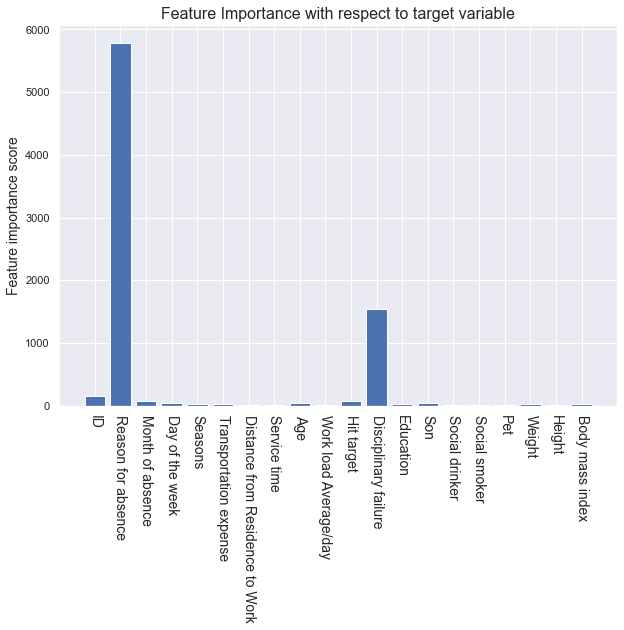

In [80]:
# plotting  the scores
plt.figure(figsize = (10,7))
plt.bar(x_train.columns, selector.scores_)
plt.xticks(rotation = -90, fontsize = 14)
plt.title('Feature Importance with respect to target variable', fontsize = 16)
plt.ylabel('Feature importance score', fontsize = 14)
plt.show()

From above plot, we see that, features 'reason for absence' and 'disciplinary failure' plays most significant role in determining different groups of workers with respect to absenteeism.

In [81]:
selector = pd.DataFrame(dict(Feature = list(x_train.columns), Scores = selector.scores_))
selector.sort_values(by = 'Scores', ascending = False ).head(30)

,Feature,Scores
1,Reason for absence,5781.670004
11,Disciplinary failure,1535.500000
0,ID,159.884628
2,Month of absence,70.693409
10,Hit target,70.099356
13,Son,45.759470
3,Day of the week,44.706758
8,Age,38.990190
5,Transportation expense,27.149873
17,Weight,25.929560


In [82]:
# keeping features with scores above threshold score.
threshold = 0
selected_features = selector[selector.Scores > threshold]
selected_features.sort_values(by = 'Scores', ascending = False )

,Feature,Scores
1,Reason for absence,5781.670004
11,Disciplinary failure,1535.500000
0,ID,159.884628
2,Month of absence,70.693409
10,Hit target,70.099356
13,Son,45.759470
3,Day of the week,44.706758
8,Age,38.990190
5,Transportation expense,27.149873
17,Weight,25.929560


In [83]:
print('no. of selected features:', len(selected_features))

no. of selected features: 20


In [84]:
# selecting highest scoring features for train and test set.
x_train = x_train[list(selected_features['Feature'])]
x_test = x_test[list(selected_features['Feature'])]

In [85]:
x_train.shape, x_test.shape

((891, 20), (222, 20))

In [86]:
x_train

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,1.169811,1.134615,1.317073,0.974359,0.978723,-0.104712,0.000000,-0.8,-1.125,0.360552,1.081081,0,0.942783,0.711310,0,0,0.921348,-0.666667,-0.333333,-0.250
1,1.000000,1.869565,0.987342,0.974359,0.801471,-0.586387,-0.195122,0.8,0.375,-0.667241,1.409639,0,1.389831,1.339394,0,1,0.986063,-0.952381,0.000000,-0.500
2,0.611109,1.000000,0.902439,0.931507,0.978723,0.565445,1.073171,3.2,1.500,0.463683,1.219512,0,0.942783,1.075988,0,0,0.921348,1.190476,0.666667,1.250
3,1.127660,1.000000,1.362069,1.259459,1.155844,-0.586387,1.219512,1.0,0.125,-0.030026,0.989362,0,0.942783,1.075988,1,0,0.986063,0.285714,0.000000,0.625
4,0.777959,1.853659,0.933333,1.274510,1.110000,-0.816754,0.048780,-1.4,-1.000,0.002706,0.937500,0,0.942783,1.075988,1,1,0.986063,-0.380952,5.000000,-0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.933334,1.853659,0.872093,0.931507,1.155844,-0.020942,1.219512,-2.4,-0.750,0.229720,0.978947,0,1.389831,0.711310,1,0,1.333062,-0.714286,2.666667,-0.625
887,1.127660,1.714286,1.250000,0.768061,1.155844,-0.586387,1.219512,1.0,0.125,1.539160,1.089109,0,0.942783,1.075988,1,0,0.986063,0.285714,0.000000,0.625
888,1.634615,1.714286,1.293103,0.974359,0.801471,0.565445,0.487805,0.0,-0.500,2.120720,1.086957,0,0.942783,1.339394,1,0,1.151899,0.333333,0.666667,0.500
889,1.300000,1.999862,0.902439,0.974359,0.978723,1.403141,-0.439024,-0.2,-0.750,0.265617,0.938144,0,0.942783,1.103448,1,0,0.986063,-0.619048,-0.333333,-0.125


### Base Model Evaluation

model: RandomForestClassifier()
CV score:0.9027905303547445
score_std: 0.04287231361529252
----------
model: LogisticRegression()
CV score:0.8940824594076797
score_std: 0.029224926333298464
----------
model: SVC()
CV score:0.8823595638851055
score_std: 0.03392666917306758
----------
model: AdaBoostClassifier()
CV score:0.7025795627423581
score_std: 0.0445150785932217
----------
model: GradientBoostingClassifier()
CV score:0.8906942277044662
score_std: 0.019353512019980208
----------
model: KNeighborsClassifier()
CV score:0.8676902480506623
score_std: 0.03732468466060218
----------
model: XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_j

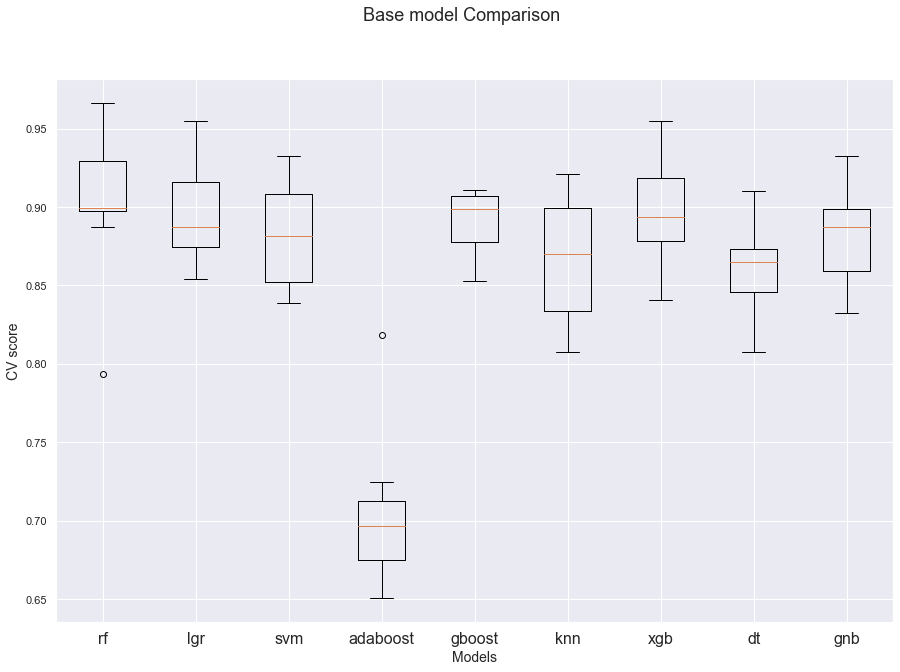

In [87]:
rf = RandomForestClassifier()
svm = SVC()
lgr = LogisticRegression()
adaboost =  AdaBoostClassifier()
gboost = GradientBoostingClassifier()
knn = KNeighborsClassifier()
xgb = xgboost.XGBClassifier()
dt = DecisionTreeClassifier()
gnb = GaussianNB()

models = [rf, lgr, svm, adaboost, gboost, knn, xgb,dt, gnb]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train, y_train, cv = s, scoring = 'f1_weighted', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 18)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rf', 'lgr','svm', 'adaboost', 'gboost', 'knn', 'xgb','dt','gnb'],
                  fontsize = 16)
plt.xlabel('Models', fontsize = 14)
plt.ylabel('CV score', fontsize = 14)
fig.set_size_inches(15,10)
plt.show() 

Based on above cross-val-scores, we shall select all models except for adaboost for tuning and testing.

### Hyper-parameter tuning

In [88]:
# initializing all model's parameter
param_gboost =  dict(
   learning_rate = [0.01,0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.5, 0.6 ],
   max_depth = [ 2, 3, 4, 5, 6, 8, 10, 12, 15],
   n_estimators = [30 ,50,75,100, 150, 200,500],
   min_samples_split = [1,2,3],
   min_samples_leaf = [1,2], random_state =  [40,41,42,43,44])

param_xgb = dict( learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
     max_depth = [ 2, 3, 4, 5, 6, 8, 10, 12, 15],
     min_child_weight = [ 1, 3, 5, 7 ],
     gamma = [0.1, 0.2 , 0.3, 0.4,0.5,0.7,1 ],
     colsample_bytree = [ 0.2,0.3, 0.4, 0.5 ,0.7], alpha = [0.05,0.1,0.5,0.75,1,1.75,2],
                 reg_lambda = [0.01,0.05,0.1,0.5,0.75,1,1.75,2])


param_rf = dict(n_estimators = [10,15,20,25,30,50,70,100], criterion = ['gini', 'entropy'],
                max_depth = [3,4,5,6,7,8,9,10,11,12,None],min_samples_split = [2,3,4],
                min_samples_leaf = [1,2,3], random_state = [40,41,42,43,44])

param_dt = dict(splitter = ['best', 'random'], criterion = ['gini', 'entropy'],
                max_depth = [2,3,4,5,6,7,8,None],min_samples_split = [2,3,4],
                min_samples_leaf = [1,2,3,4,5], random_state = [40,41,42,43,44],
                )

param_svm = dict(kernel = ['rbf','poly','sigmoid','linear'], gamma = np.arange(0.25,3,0.25), 
                 degree = [2,3,4],
             C = np.logspace(4,-4,60))



param_lgr = dict(penalty = ['l1','l2'],  C = np.logspace(4,-4,60), 
                 solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 max_iter = [100,150,200,250,300])

param_knn = dict(n_neighbors = np.arange(1,50,1), algorithm = ['auto','ball_tree','kd_tree','brute'],
                leaf_size = [25,30,35], p = [1,2], weights = ['uniform','distance'])

In [89]:
model_param_list = [( gboost,param_gboost), ( xgb,param_xgb), (rf,param_rf),
                    (dt, param_dt),(lgr,param_lgr), (svm, param_svm),
                    (knn,param_knn)]

In [90]:
%%time
best_estimator_list = []
for model, param in model_param_list:
    
    r_search = RandomizedSearchCV(model, param, cv = s, n_jobs = -1, scoring = 'f1_weighted',
                                  random_state = 42)
    r_search.fit(x_train, y_train.values.ravel())
    best_cvscore = r_search.best_score_
    best_param = r_search.best_params_
    best_estimator = r_search.best_estimator_
    best_estimator_list.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_param:', best_param)
    print('\n')
    
print('best_estimators:',best_estimator_list)

model: GradientBoostingClassifier()
best_cvscore: 0.9019388653635667
best_param: {'random_state': 44, 'n_estimators': 75, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 15, 'learning_rate': 0.25}


model: XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
best_cvscore: 0.9098857769081892
best_param: {'reg_lambda': 1.75, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.1, 'colsampl

In [91]:
best_estimator_list.append(gnb) # appending gnb algorithm for testing

### Testing

In [92]:
print('*******TRAIN RESULTS*******')
print('\n')

for model in best_estimator_list:
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_train)
    score = accuracy_score(y_train, y_pred)
    print('model',model,'\n')
    print('accuracy:',round(score*100,2),'%','\n')

    #print('f1_score:',round(f1_score(y_train,y_pred)*100,2,  average ),'%','\n')
    print('Classification report:','\n', classification_report(y_train, y_pred))
    print('------------------------------------------------------------------------------')
    print('\n')

*******TRAIN RESULTS*******


model GradientBoostingClassifier(learning_rate=0.25, max_depth=15, min_samples_leaf=2,
                           n_estimators=75, random_state=44) 

accuracy: 99.78 % 

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       1.00      0.99      1.00       297
           2       0.99      1.00      1.00       297

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891

------------------------------------------------------------------------------


model XGBClassifier(alpha=0.5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_c

In [93]:
print('*******TEST RESULTS********')
print('\n')

for model in best_estimator_list:
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    
    print('Model:',model,'\n')
    print('accuracy:',round(score*100,2),'%','\n')
    print('f1_score:',round(f1_score(y_test,y_pred, average = 'weighted')*100,2),'%','\n')
    print('Classification report:','\n', classification_report(y_test, y_pred))
    print('------------------------------------------------------------------------------')
    print('\n') 

*******TEST RESULTS********


Model: GradientBoostingClassifier(learning_rate=0.25, max_depth=15, min_samples_leaf=2,
                           n_estimators=75, random_state=44) 

accuracy: 77.03 % 

f1_score: 77.11 % 

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.80      0.80      0.80       128
           2       0.69      0.70      0.70        81

    accuracy                           0.77       222
   macro avg       0.83      0.81      0.82       222
weighted avg       0.77      0.77      0.77       222

------------------------------------------------------------------------------


Model: XGBClassifier(alpha=0.5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=

Based on above test results, we see that LogisticRegression model performed the best. Now let us visualize this test result on heatmaps.

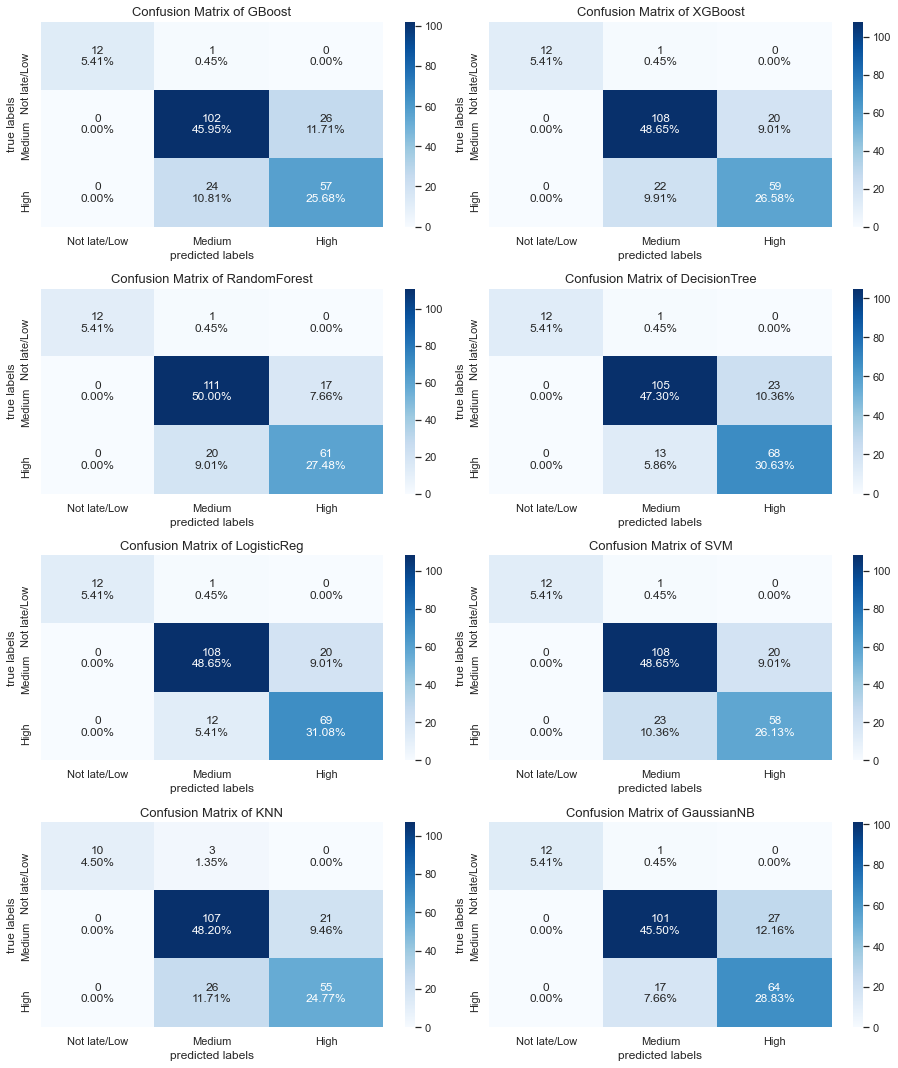

In [94]:
# visualizing confusion matrix  with the help of heatmaps.
model_index = [0,1,2,3,4,5,6,7,8]
model = ['GBoost','XGBoost','RandomForest','DecisionTree','LogisticReg','SVM','KNN','GaussianNB']

for index ,model, model_name in zip(model_index,best_estimator_list,model):
    plt.subplot(4,2, index + 1 )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    c_matric = confusion_matrix(y_test, y_pred)

    group_counts = ['{0:0.0f}'.format(value) for value in
                c_matric.flatten()]
    group_percent = ['{0:.2%}'.format(value) for value in
                     c_matric.flatten()/np.sum(c_matric)]
    labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_counts,group_percent)]
    labels = np.asarray(labels).reshape(3,3)
    sb.heatmap(c_matric, annot=labels, fmt='', cmap='Blues')
    plt.title('Confusion Matrix of ' + model_name, fontsize = 13)
    
    plt.ylabel('true labels')
    plt.xlabel('predicted labels')
    fig, ax = plt.gcf(), plt.gca()
    ax.set_xticklabels(['Not late/Low','Medium','High'])
    ax.set_yticklabels(['Not late/Low','Medium','High'])
    fig.set_size_inches(13, 15)
    plt.tight_layout()
plt.show()

By analysing above heatmaps, we clearly see that LogisticRegression model performed better on correctly predicting classes like- 'Medium' and 'High', particularly on class 'High', which are important classes to predict the number of absent workers that may be absent for a long time, which further may lead to improper function of an organization, also, LogisticRegression being a simpler model, is also preferable to deploy. Therefore, we shall choose our classifier as LogisticRegression in this project.

In [95]:
# selecting best model as LogisticRegression.
selected_model =   LogisticRegression(C=4.075392965871778, max_iter=300, penalty='l1',
                   solver='saga') 

selected_model.fit(x_train, y_train)
y_pred = selected_model.predict(x_test)

In [96]:
test_df = pd.DataFrame({'Actual group':y_test.values,'Predicted group':y_pred})

In [97]:
test_df.to_csv('absenteeism_pred.csv', index = False)
print('Predicted result stored sucessfully.')

Predicted result stored sucessfully.


In [98]:
# Saving the final model as LogisticRegression.
import joblib

joblib.dump(selected_model, 'absenteeism_pred.obj')
print('Model successfully saved.')

Model successfully saved.
